<a href="https://colab.research.google.com/github/manisharan-deep/Explainable-AI-Lab-Assignment/blob/main/EXPLAINABLE_AI_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1    Skill Boost – Coding Bootcamp   
     Context:
          Skill Boost sees that attending free webinars leads to higher course sign-ups.
Webinars Attended
(x)
Sign-ups
(y)
0 5
1 15
2 25
0 8
1 18

    Objective:
Analyze the effect of attending free webinars on the number of sign-ups for Skill Boost's coding
boot camp by performing Linear Regression and interpreting SHAP values.
    Requirements:
1. Perform Linear Regression Analysis
o Use the given dataset where:
▪ Independent Variable (x): Webinars Attended
▪ Dependent Variable (y): Sign-ups
2. Calculate the Baseline Value
o Compute the mean of all sign-up values (y values).
3. Calculate SHAP Values
o For each record, calculate the difference between the predicted value and the
baseline.
o This difference is the SHAP value, attributed to the number of webinars attended.
4. Compute Final Prediction
o Use the linear regression model to calculate predicted sign-ups for each webinar
count.
o Confirm that:
Final Prediction=Baseline+SHAP Value\text{Final Prediction} = \text{Baseline}
+ \text{SHAP Value}Final Prediction=Baseline+SHAP Value  
5. Interpret the Results
o Explain how the number of webinars attended influenced each predicted sign-up
count.
o Compare the predicted value to the actual value for each row.
o Identify under prediction or over prediction, and provide reasoning.
    

    Deliverables:
• Linear regression implementation with coefficients
• Baseline (mean of y)
• Table of SHAP values and predictions
• Explanation of how each input influenced the prediction
• Comparison of predicted vs actual values, with over/under prediction notes
• Summary analysis covering:
▪ Accuracy of the model
▪ Trend analysis
▪ SHAP interpretation insights

 Linear Regression Equation: y = 9.357x + 6.714

 Baseline (mean of y): 14.2

 Results Table:

   Webinars Attended (x)  Actual Sign-ups (y)  Predicted Sign-ups  SHAP Value  \
0                      0                    5               6.714      -7.486   
1                      1                   15              16.071       1.871   
2                      2                   25              25.429      11.229   
3                      0                    8               6.714      -7.486   
4                      1                   18              16.071       1.871   

   Baseline + SHAP Over/Under Prediction  
0            6.714                  Over  
1           16.071                  Over  
2           25.429                  Over  
3            6.714                 Under  
4           16.071                 Under  


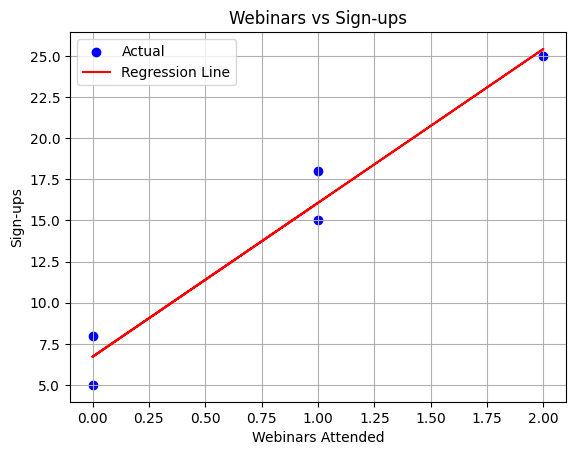

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 1. Data
x = np.array([0, 1, 2, 0, 1]).reshape(-1, 1)
y = np.array([5, 15, 25, 8, 18])

# 2. Linear Regression
model = LinearRegression()
model.fit(x, y)

slope = model.coef_[0]
intercept = model.intercept_

# 3. Predictions
y_pred = model.predict(x)

# 4. Baseline (mean of y)
baseline = np.mean(y)

# 5. SHAP values = prediction - baseline
shap_values = y_pred - baseline

# 6. Confirm SHAP + Baseline = Prediction
confirmation = baseline + shap_values

# 7. Put it all in a table
df = pd.DataFrame({
    'Webinars Attended (x)': x.flatten(),
    'Actual Sign-ups (y)': y,
    'Predicted Sign-ups': np.round(y_pred, 3),
    'SHAP Value': np.round(shap_values, 3),
    'Baseline + SHAP': np.round(confirmation, 3),
    'Over/Under Prediction': ['Over' if pred > actual else 'Under' for pred, actual in zip(y_pred, y)]
})

# 8. Output
print(" Linear Regression Equation: y = {:.3f}x + {:.3f}".format(slope, intercept))
print("\n Baseline (mean of y):", round(baseline, 3))
print("\n Results Table:\n")
print(df)

# 9. Optional: Visualization
plt.scatter(x, y, color='blue', label='Actual')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('Webinars Attended')
plt.ylabel('Sign-ups')
plt.title('Webinars vs Sign-ups')
plt.legend()
plt.grid(True)
plt.show()


2 FinTrack – Investment Signup Prediction using Multiple Linear
Regression and SHAP Analysis  
Objective:
Evaluate how the number of webinars and blog posts published influence new user signups using
Multiple Linear Regression and explain the outcomes using SHAP value interpretation.
Given Dataset:
Webinar
 s (x₁)
Blog
 s (x₂)
Signu
 ps (y)
3 5 60
2 3 45
1 4 40
4 2 55
2 1 35

Tasks:
1. Perform Multiple Linear Regression Analysis
o Use Webinars and Blogs as independent variables
o Use Signups as the dependent variable
2. Calculate the Baseline Value
o Compute the mean of all signup values
3. Calculate SHAP Values
o Calculate SHAP Value  
o Distribute SHAP contributions between Webinars and Blogs based on model
coefficients
4. Compute Final Prediction for Each Record
o Use the regression equation
o Verify: Prediction = Baseline + SHAP (Webinars) + SHAP (Blogs)
5. Interpret the Results
o For each record, explain how webinars and blogs affected the prediction
o Compare predicted vs actual signup values
o Indicate if the model overpredicted or underpredicted and suggest possible
causes

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1. Dataset
data = {
    'Webinars (x1)': [3, 2, 1, 4, 2],
    'Blogs (x2)': [5, 3, 4, 2, 1],
    'Signups (y)': [60, 45, 40, 55, 35]
}

df = pd.DataFrame(data)

# Features and Target
X = df[['Webinars (x1)', 'Blogs (x2)']]
y = df['Signups (y)']

# 2. Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X, y)

# Coefficients
coef_webinars = model.coef_[0]
coef_blogs = model.coef_[1]
intercept = model.intercept_

# 3. Baseline (mean of y)
baseline = y.mean()

# 4. Predictions
predictions = model.predict(X)

# 5. SHAP Value Calculation (manual based on coefficients)
# SHAP value for each feature: (feature value - average feature value) * coefficient

# Centered inputs
webinars_centered = X['Webinars (x1)'] - X['Webinars (x1)'].mean()
blogs_centered = X['Blogs (x2)'] - X['Blogs (x2)'].mean()

# SHAP values (approximated by coefficient * centered feature)
shap_webinars = webinars_centered * coef_webinars
shap_blogs = blogs_centered * coef_blogs

# Final Prediction = Baseline + SHAP contributions
shap_sum = shap_webinars + shap_blogs
prediction_check = baseline + shap_sum

# Determine over/under prediction
over_under = ['Over' if pred > actual else 'Under' for pred, actual in zip(predictions, y)]

# 6. Results DataFrame
results = pd.DataFrame({
    'Webinars': X['Webinars (x1)'],
    'Blogs': X['Blogs (x2)'],
    'Actual Signups': y,
    'Predicted Signups': np.round(predictions, 2),
    'Baseline': round(baseline, 2),
    'SHAP Webinars': np.round(shap_webinars, 2),
    'SHAP Blogs': np.round(shap_blogs, 2),
    'Baseline + SHAP': np.round(prediction_check, 2),
    'Over/Under Prediction': over_under
})

# 7. Print Outputs
print(" Regression Equation: y = {:.3f}*Webinars + {:.3f}*Blogs + {:.3f}".format(
    coef_webinars, coef_blogs, intercept
))
print("\n Baseline (mean of y):", round(baseline, 2))
print("\n Results Table:\n")
print(results)


 Regression Equation: y = 7.745*Webinars + 4.275*Blogs + 15.588

 Baseline (mean of y): 47.0

 Results Table:

   Webinars  Blogs  Actual Signups  Predicted Signups  Baseline  \
0         3      5              60              60.20      47.0   
1         2      3              45              43.90      47.0   
2         1      4              40              40.43      47.0   
3         4      2              55              55.12      47.0   
4         2      1              35              35.35      47.0   

   SHAP Webinars  SHAP Blogs  Baseline + SHAP Over/Under Prediction  
0           4.65        8.55            60.20                  Over  
1          -3.10        0.00            43.90                 Under  
2         -10.84        4.27            40.43                  Over  
3          12.39       -4.27            55.12                  Over  
4          -3.10       -8.55            35.35                  Over  


3 Regression with Diabetes Dataset  
Objective:
Understand how patient features influence disease progression using Multiple Linear Regression and
SHAP value analysis.
 Tasks
1. Perform Multiple Linear Regression Analysis
• Use all available features from the Diabetes dataset as independent variables.
• Fit a Multiple Linear Regression model to predict disease progression.
2. Calculate the Baseline Value
• Compute the mean of the target variable (disease progression scores) from the
training data.
• This will serve as the baseline prediction.
3. Calculate SHAP Values
• Apply SHAP to compute feature contributions to each prediction.
• Use model coefficients to proportionally attribute the difference from the baseline to
each feature.
4. Compute Final Prediction for Each Record
• For every test record, verify that:
Prediction = Baseline + SHAP(Feature₁) + SHAP(Feature₂) + ... + SHAP(Featureₙ)
5. Interpret the Results
• For each patient record:
o Explain how each feature contributed to the predicted disease progression.
o Compare the predicted value vs the actual observed value.
o Comment on whether the model overpredicted or underpredicted and why,
based on SHAP values.

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Load Diabetes Dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='Disease Progression')

# 2. Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Get Model Coefficients and Intercept
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_

# 5. Compute Baseline (mean of training target)
baseline = y_train.mean()

# 6. Predict on Test Set
y_pred = model.predict(X_test)

# 7. Calculate SHAP values (manually using model coefficients)
X_test_centered = X_test - X_train.mean()
shap_values = X_test_centered.mul(coefficients, axis=1)

# Sum of SHAP values + baseline should equal predictions
shap_sum = shap_values.sum(axis=1)
prediction_check = baseline + shap_sum

# Determine over/under prediction
over_under = ['Over' if pred > actual else 'Under' for pred, actual in zip(y_pred, y_test)]

# 8. Combine Everything into a Results Table (first 10 rows for clarity)
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': np.round(y_pred, 2),
    'Baseline': round(baseline, 2),
    'SHAP Sum': np.round(shap_sum, 2),
    'Baseline + SHAP': np.round(prediction_check, 2),
    'Over/Under Prediction': over_under
}, index=y_test.index)

# Include SHAP values for each feature
shap_feature_values = shap_values.round(2)
results = pd.concat([results, shap_feature_values], axis=1)

# Display first 10 results
print(" Linear Regression Model Coefficients:\n")
print(coefficients)

print("\n Baseline (mean disease progression in training):", round(baseline, 2))

print("\n Prediction and SHAP Table (First 10 Test Records):\n")
print(results.head(10))


 Linear Regression Model Coefficients:

age     37.904021
sex   -241.964362
bmi    542.428759
bp     347.703844
s1    -931.488846
s2     518.062277
s3     163.419983
s4     275.317902
s5     736.198859
s6      48.670657
dtype: float64

 Baseline (mean disease progression in training): 153.74

 Prediction and SHAP Table (First 10 Test Records):

     Actual  Predicted  Baseline  SHAP Sum  Baseline + SHAP  \
287   219.0     139.55    153.74    -14.19           139.55   
211    70.0     179.52    153.74     25.78           179.52   
72    202.0     134.04    153.74    -19.70           134.04   
321   230.0     291.42    153.74    137.68           291.42   
73    111.0     123.79    153.74    -29.95           123.79   
418    84.0      92.17    153.74    -61.56            92.17   
367   242.0     258.23    153.74    104.50           258.23   
354   272.0     181.34    153.74     27.60           181.34   
281    94.0      90.22    153.74    -63.51            90.22   
148    96.0     108.63 

4 Regression with Student Performance Dataset  
Objective:
Investigate how student background and behavior influence final exam scores using Multiple Linear
Regression and SHAP value analysis.
 Tasks
1. Perform Multiple Linear Regression Analysis
• Use all relevant student attributes (e.g., study time, parental education, absences, etc.)
as independent variables.
• Fit a regression model to predict the final exam score.
2. Calculate the Baseline Value
• Compute the mean of the final exam scores from the training set.
• This serves as the baseline prediction (expected value).
3. Calculate SHAP Values
• Use SHAP to compute the contribution of each student attribute to the final exam
score prediction.
• Distribute the prediction deviation from the baseline among the features.
4. Compute Final Prediction for Each Record
• For each student record, confirm:
Predicted Score = Baseline + SHAP(Feature₁) + SHAP(Feature₂) + ... + SHAP(Featureₙ)
5. Interpret the Results
• For every prediction:
o Explain how different features (e.g., study time, failures, health) impacted the
exam score.
o Compare predicted score to actual score.
o Comment on overprediction or underprediction and possible reasons behind it.

Mean Squared Error: 4.082628398521859
R² Score: 0.9889832909573145


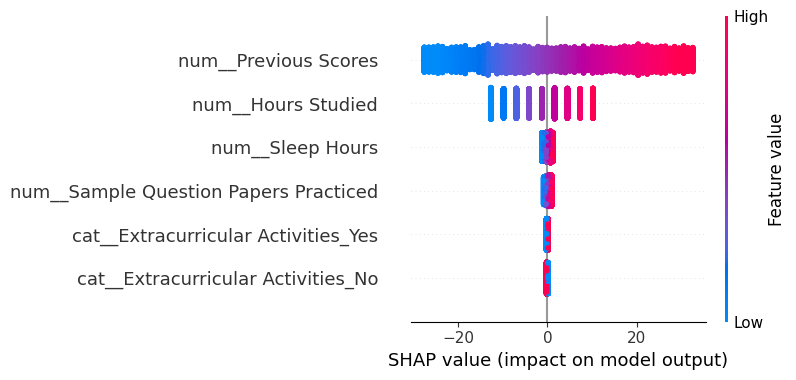

   Actual  Predicted  Predicted_Rounded
0    51.0  54.711854               55.0
1    20.0  22.615513               23.0
2    46.0  47.903145               48.0
3    28.0  31.289767               31.0
4    41.0  43.004570               43.0


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import shap
import matplotlib.pyplot as plt


# 1. Load Dataset

df = pd.read_csv("/content/Student_Performance.csv")  # Change to your file path

target_col = "Performance Index"

if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found. Available columns: {df.columns.tolist()}")


# 2. Features & Target

X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# 3. Preprocessing

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)


# 4. Model Pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


# 5. Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 6. Train Model

model.fit(X_train, y_train)


# 7. Predictions

y_pred = model.predict(X_test)
y_pred_rounded = np.rint(y_pred)


# 8. Evaluation

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


# 9. SHAP Explainability

# Get transformed training data for SHAP
X_train_transformed = preprocessor.fit_transform(X_train)

explainer = shap.Explainer(model.named_steps['regressor'], X_train_transformed)
shap_values = explainer(X_train_transformed)

# Summary plot
shap.summary_plot(shap_values, X_train_transformed, feature_names=preprocessor.get_feature_names_out())


# 10. Optional: Compare Actual vs Predicted

results_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred,
    "Predicted_Rounded": y_pred_rounded
})
print(results_df.head())